### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [4]:
#Number of missing data in each column
data.isna().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [5]:
#percentage of mission data in each column
data.isna().mean() * 100

destination              0.000000
passanger                0.000000
weather                  0.000000
temperature              0.000000
time                     0.000000
coupon                   0.000000
expiration               0.000000
gender                   0.000000
age                      0.000000
maritalStatus            0.000000
has_children             0.000000
education                0.000000
occupation               0.000000
income                   0.000000
car                     99.148534
Bar                      0.843582
CoffeeHouse              1.710817
CarryAway                1.190476
RestaurantLessThan20     1.024913
Restaurant20To50         1.490066
toCoupon_GEQ5min         0.000000
toCoupon_GEQ15min        0.000000
toCoupon_GEQ25min        0.000000
direction_same           0.000000
direction_opp            0.000000
Y                        0.000000
dtype: float64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [7]:
#Unique values in important columns 
for i in ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']:
    print(data[i].unique())

['never' 'less1' '1~3' 'gt8' nan '4~8']
['never' 'less1' '4~8' '1~3' 'gt8' nan]
[nan '4~8' '1~3' 'gt8' 'less1' 'never']
['4~8' '1~3' 'less1' 'gt8' nan 'never']
['1~3' 'less1' 'never' 'gt8' '4~8' nan]


In [8]:
#From the columns missing data, how many of the rows are missing data in all of the columns with missing data
nulls = ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']
df_nulls = data[nulls]
df_nulls[df_nulls.isna().all(axis=1)].shape[0]

42

3. Decide what to do about your missing data -- drop, replace, other...

In [9]:
#Based on the above analyis I decided to drop the column 'car' since more than 99% of the data is missing in this column. Since other missing data constitutes to less than 5% of the data 
#decided to drop the rows that are missing data  
data = data.drop('car', axis=1)

In [10]:
data=data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12079 entries, 22 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12079 non-null  object
 1   passanger             12079 non-null  object
 2   weather               12079 non-null  object
 3   temperature           12079 non-null  int64 
 4   time                  12079 non-null  object
 5   coupon                12079 non-null  object
 6   expiration            12079 non-null  object
 7   gender                12079 non-null  object
 8   age                   12079 non-null  object
 9   maritalStatus         12079 non-null  object
 10  has_children          12079 non-null  int64 
 11  education             12079 non-null  object
 12  occupation            12079 non-null  object
 13  income                12079 non-null  object
 14  Bar                   12079 non-null  object
 15  CoffeeHouse           12079 non-nul

4. What proportion of the total observations chose to accept the coupon? 



In [20]:
prop = data['Y'].mean() *100
print("The proportion of the total observations chose to accept the coupon is " + str(round(prop)) + "%")

The proportion of the total observations chose to accept the coupon is 57%


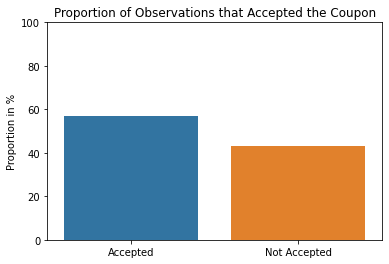

In [23]:
plt.figure(figsize=(6, 4))
sns.barplot(x=['Accepted', 'Not Accepted'], y=[prop, 100 - prop])
plt.title('Proportion of Observations that Accepted the Coupon')
plt.ylabel('Proportion in %')
plt.ylim(0, 100)
plt.show()

5. Use a bar plot to visualize the `coupon` column.

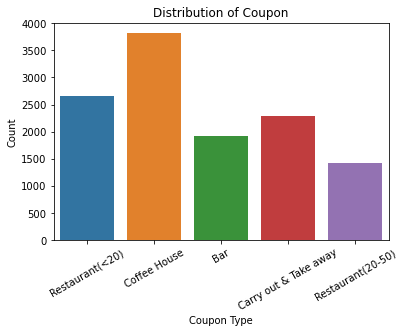

In [28]:
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='coupon', data=data).set
plt.title('Distribution of Coupon')
plt.xlabel('Coupon Type')
plt.ylabel('Count')
#Rotate X-axis labels
plt.xticks(rotation=30)
plt.show()

6. Use a histogram to visualize the temperature column.

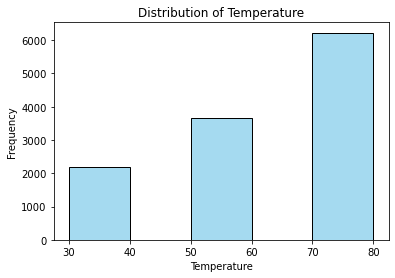

In [32]:
plt.figure(figsize=(6, 4))
sns.histplot(data=data, x='temperature', bins=5, color='skyblue', edgecolor='black')
plt.title('Distribution of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [33]:
#Unique values in the coupons column
data['coupon'].unique()

array(['Restaurant(<20)', 'Coffee House', 'Bar', 'Carry out & Take away',
       'Restaurant(20-50)'], dtype=object)

In [34]:
#create a new dataframne for bar coupons
df_bar = data.query("coupon == 'Bar'")
df_bar

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
39,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,1,0,1,1
46,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,0,1,0
57,Home,Alone,Sunny,55,6PM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12664,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12667,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12670,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0


2. What proportion of bar coupons were accepted?


In [35]:
proportion=df_bar['Y'].value_counts()[1] / len(df_bar)
print(str(round(proportion * 100 )) + '% of bar coupons were accepted') 

41% of bar coupons were accepted


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [147]:
#Unique values in the Bar column
df_bar['Bar'].unique()

array(['never', 'less1', '1~3', 'gt8', '4~8'], dtype=object)

In [38]:
#create a new column bar_visits with two values, those who sent bar 3 or more times (>3) and those who went to the bar less than 3 times (less3)
df_bar['bar_visits'] = df_bar['Bar'].replace(['never', 'less1', '1~3'], 'less3')
df_bar['bar_visits'].replace(['4~8', 'gt8'], '>3', inplace=True)
df_bar.head()

<ipython-input-38-3488bf2c361f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bar['bar_visits'] = df_bar['Bar'].replace(['never', 'less1', '1~3'], 'less3')
C:\Users\m_shanmugavel\Anaconda3\lib\site-packages\pandas\core\series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,bar_visits
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,4~8,4~8,less1,1,0,0,0,1,1,less3
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,4~8,4~8,less1,1,0,0,1,0,1,less3
39,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,4~8,4~8,less1,1,1,1,0,1,1,less3
46,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,46,Single,...,1~3,1~3,never,1,0,0,0,1,0,less3
57,Home,Alone,Sunny,55,6PM,Bar,1d,Male,46,Single,...,1~3,1~3,never,1,0,0,1,0,0,less3


In [39]:
df_bar['bar_visits'].unique()

array(['less3', '>3'], dtype=object)

In [40]:
df_bar.groupby('bar_visits')[['Y']].mean()

,Y
bar_visits,
>3,0.761658
less3,0.372674


In [43]:
#Group by bar visits and acceptance and compute mean()
bar_acceptance_grp = df_bar.groupby('bar_visits')[['Y']].mean()
bar_acceptance_rate= bar_acceptance_grp.reset_index()
accept_more_than3 = bar_acceptance_rate.loc[bar_acceptance_rate['bar_visits'] == '>3', 'Y'].iloc[0] * 100
accept_less_than3 = bar_acceptance_rate.loc[bar_acceptance_rate['bar_visits'] == 'less3', 'Y'].iloc[0] * 100
print("Acceptance rate of people who went to a bar more than 3 times is " + str(round(accept_more_than3)) + "%")
print("Acceptance rate of people who went to a bar less than 3 times is " + str(round(accept_less_than3)) + "%") 

Acceptance rate of people who went to a bar more than 3 times is 76%
Acceptance rate of people who went to a bar less than 3 times is 37%


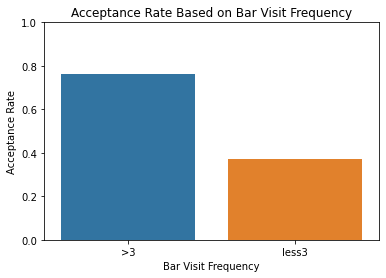

In [45]:
sns.barplot(x='bar_visits', y='Y', data=bar_acceptance_rate)
plt.title('Acceptance Rate Based on Bar Visit Frequency')
plt.xlabel('Bar Visit Frequency')
plt.ylabel('Acceptance Rate')
plt.ylim(0, 1)
plt.show()

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [46]:
#create a new column bar_visits with two values, those who went to bar 1 or more times (>1) and those who went to the bar less than 1 times (less3)
df_bar['bar_visits_25'] = df_bar['Bar'].replace(['never', 'less1'], '<1')
df_bar['bar_visits_25'].replace(['1~3', 'gt8', '4~8'], '>1', inplace=True)
df_bar.head()

<ipython-input-46-7c60a6cb9610>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bar['bar_visits_25'] = df_bar['Bar'].replace(['never', 'less1'], '<1')
C:\Users\m_shanmugavel\Anaconda3\lib\site-packages\pandas\core\series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,bar_visits,bar_visits_25
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,4~8,less1,1,0,0,0,1,1,less3,<1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,4~8,less1,1,0,0,1,0,1,less3,<1
39,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,4~8,less1,1,1,1,0,1,1,less3,<1
46,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,46,Single,...,1~3,never,1,0,0,0,1,0,less3,<1
57,Home,Alone,Sunny,55,6PM,Bar,1d,Male,46,Single,...,1~3,never,1,0,0,1,0,0,less3,<1


In [170]:
#unique values in the age column
df_bar['age'].unique()

array(['21', '46', '26', '31', '41', '50plus', '36', 'below21'],
      dtype=object)

In [47]:
#create new column with values, age >25 and < 25
df_bar['age_25'] = df_bar['age'].replace(['46', '26', '31', '41', '50plus', '36'], '>25')
df_bar['age_25'].replace(['21', 'below21'], '<25', inplace=True)
df_bar.head()

<ipython-input-47-3be9321165d9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bar['age_25'] = df_bar['age'].replace(['46', '26', '31', '41', '50plus', '36'], '>25')
C:\Users\m_shanmugavel\Anaconda3\lib\site-packages\pandas\core\series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,bar_visits,bar_visits_25,age_25
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,1,0,0,0,1,1,less3,<1,<25
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,1,0,0,1,0,1,less3,<1,<25
39,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,less1,1,1,1,0,1,1,less3,<1,<25
46,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,46,Single,...,never,1,0,0,0,1,0,less3,<1,>25
57,Home,Alone,Sunny,55,6PM,Bar,1d,Male,46,Single,...,never,1,0,0,1,0,0,less3,<1,>25


In [48]:
# Group by bar visits(less than or greater than 1 times) and age
bar_acceptance_25 = df_bar.groupby(['bar_visits_25', 'age_25'])[['Y']].mean()
bar_acceptance_rate25= bar_acceptance_25.reset_index()


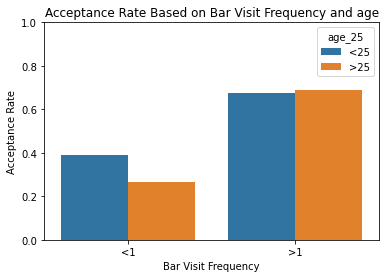

In [49]:
sns.barplot(x='bar_visits_25', y='Y', hue="age_25", data=bar_acceptance_rate25)
plt.title('Acceptance Rate Based on Bar Visit Frequency and age')
plt.xlabel('Bar Visit Frequency')
plt.ylabel('Acceptance Rate')
plt.ylim(0, 1)
plt.show()

#### Based on the plot above, driver's age does seem to matter in the acceptance rate  if the drivers visit the bar more than once in a month

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [50]:
df_bar['occupation'].unique()

array(['Architecture & Engineering', 'Student',
       'Education&Training&Library', 'Unemployed', 'Healthcare Support',
       'Healthcare Practitioners & Technical', 'Sales & Related',
       'Management', 'Arts Design Entertainment Sports & Media',
       'Computer & Mathematical', 'Life Physical Social Science',
       'Personal Care & Service', 'Office & Administrative Support',
       'Construction & Extraction', 'Legal', 'Retired',
       'Community & Social Services', 'Installation Maintenance & Repair',
       'Transportation & Material Moving', 'Business & Financial',
       'Protective Service', 'Food Preparation & Serving Related',
       'Production Occupations',
       'Building & Grounds Cleaning & Maintenance',
       'Farming Fishing & Forestry'], dtype=object)

In [51]:
df_bar['passanger'].unique()

array(['Friend(s)', 'Alone', 'Kid(s)', 'Partner'], dtype=object)

In [69]:
#create a new dataframe dropping rows with passanger as kids and occupation a "Farming Fishing & Forestry"
df_occupation=df_bar.query('passanger != "Kid(s)" and occupation != "Farming Fishing & Forestry"')
proportion=df_occupation['Y'].mean() *100
print(str(round(proportion)) + '% of bar coupons were accepted by drivers without kids passanger and not in Farming Fishing & Forestry') 

43% of bar coupons were accepted by drivers without kids passanger and not in Farming Fishing & Forestry


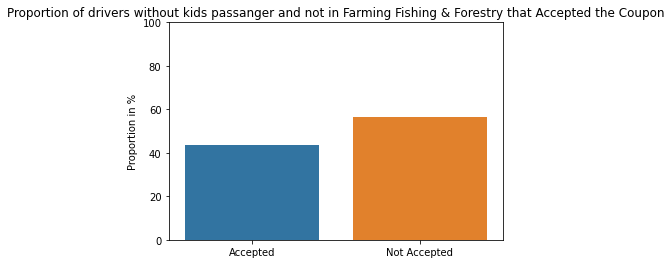

In [68]:
plt.figure(figsize=(6, 4))
sns.barplot(x=['Accepted', 'Not Accepted'], y=[proportion, 100 - proportion])
plt.title('Proportion of drivers without kids passanger and not in Farming Fishing & Forestry that Accepted the Coupon')
plt.ylabel('Proportion in %')
plt.ylim(0, 100)
plt.show()

In [71]:

bar_acceptance_occupation = df_occupation.groupby(['bar_visits_25', 'passanger'])[['Y']].mean()
bar_acceptance_occupation= bar_acceptance_occupation.reset_index()

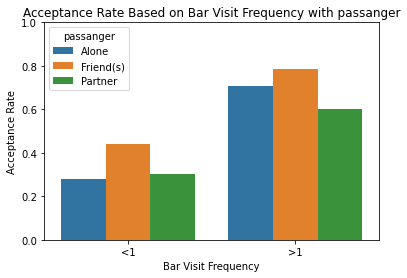

In [72]:
sns.barplot(x='bar_visits_25', y='Y', hue='passanger',data=bar_acceptance_occupation)
plt.title('Acceptance Rate Based on Bar Visit Frequency with passanger')
plt.xlabel('Bar Visit Frequency')
plt.ylabel('Acceptance Rate')
plt.ylim(0, 1)
plt.show()

#### Based on above analysis,Acceptance rate is proportionately higher in drivers going to bar with friends

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [73]:
df_status=df_bar.query('passanger != "Kid(s)" and maritalStatus != "Widowed"')
df_status_acceptance=df_status.groupby(['bar_visits_25'])[['Y']].mean()
df_grp=df_status.groupby(['bar_visits_25', 'passanger','maritalStatus'])[['Y']].mean()

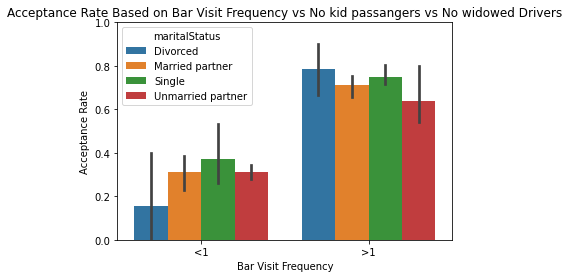

In [78]:
sns.barplot(x='bar_visits_25', y='Y', hue='maritalStatus',data=df_grp.reset_index())
plt.title('Acceptance Rate Based on Bar Visit Frequency vs No kid passangers vs No widowed Drivers')
plt.xlabel('Bar Visit Frequency')
plt.ylabel('Acceptance Rate')
plt.ylim(0, 1)
plt.show()

#### From the analysis above, Acceptance rate is higher among drivers that are Divorced and single 

In [79]:
#create a new column for age with values greater than and less than 30
df_bar['age_30'] = df_bar['age'].replace(['46', '31', '41', '50plus', '36'], '>30')
df_bar['age_30'].replace(['21', '26','below21'], '<30', inplace=True)
df_bar.head()

<ipython-input-79-6797e0a7e9bc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bar['age_30'] = df_bar['age'].replace(['46', '31', '41', '50plus', '36'], '>30')
C:\Users\m_shanmugavel\Anaconda3\lib\site-packages\pandas\core\series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,bar_visits,bar_visits_25,age_25,age_30
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,1,0,0,0,1,1,less3,<1,<25,<30
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,1,0,0,1,0,1,less3,<1,<25,<30
39,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,1,1,1,0,1,1,less3,<1,<25,<30
46,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,46,Single,...,1,0,0,0,1,0,less3,<1,>25,>30
57,Home,Alone,Sunny,55,6PM,Bar,1d,Male,46,Single,...,1,0,0,1,0,0,less3,<1,>25,>30


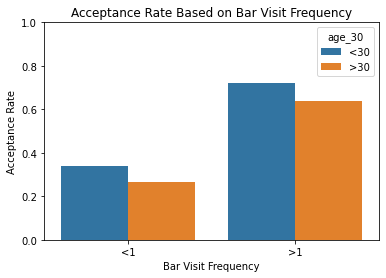

In [80]:
bar_acceptance_30 = df_bar.groupby(['bar_visits_25', 'age_30'])[['Y']].mean()
bar_acceptance_rate30= bar_acceptance_30.reset_index()
sns.barplot(x='bar_visits_25', y='Y', hue="age_30", data=bar_acceptance_rate30)
plt.title('Acceptance Rate Based on Bar Visit Frequency')
plt.xlabel('Bar Visit Frequency')
plt.ylabel('Acceptance Rate')
plt.ylim(0, 1)
plt.show()

#### Based on the analysis above, acceptance rate is higher among drivers with age less than 30

In [239]:
#go to cheap restaurants more than 4 times a month and income is less than 50K.
data['RestaurantLessThan20'].unique()

array(['4~8', '1~3', 'less1', 'gt8', 'never'], dtype=object)

In [231]:
data['income'].unique()                

array(['$37500 - $49999', '$62500 - $74999', '$12500 - $24999',
       '$75000 - $87499', '$50000 - $62499', '$25000 - $37499',
       '$100000 or More', '$87500 - $99999', 'Less than $12500'],
      dtype=object)

In [82]:
res_categories = ["4~8", "gt8"]
income_categories = ["$37500 - $49999", "$12500 - $24999", "$25000 - $37499", "Less than $12500"]
df_cheap = data.query("`RestaurantLessThan20` in @res_categories and `income` in @income_categories")
df_cheap.groupby(['RestaurantLessThan20', 'income'])[['Y']].mean()

Y
RestaurantLessThan20 income                    
4~8                  $12500 - $24999   0.541176
                     $25000 - $37499   0.571770
                     $37500 - $49999   0.614286
                     Less than $12500  0.585714
gt8                  $12500 - $24999   0.602410
                     $25000 - $37499   0.659091
                     $37500 - $49999   0.662879
                     Less than $12500  0.761468

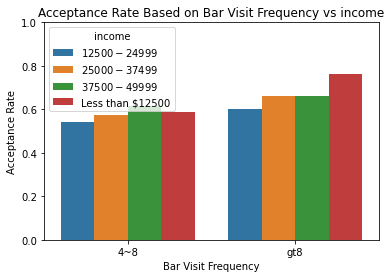

In [83]:
df_acceptance = df_cheap.groupby(['RestaurantLessThan20', 'income'])[['Y']].mean()
df_acceptance= df_acceptance.reset_index()
sns.barplot(x='RestaurantLessThan20', y='Y', hue="income", data=df_acceptance)
plt.title('Acceptance Rate Based on Bar Visit Frequency vs income')
plt.xlabel('Bar Visit Frequency')
plt.ylabel('Acceptance Rate')
plt.ylim(0, 1)
plt.show()

#### Based on the analysis above, acceptance rate is higher among drivers with income lessthan $12500

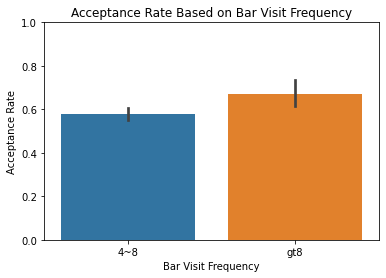

In [263]:
df_acceptance = df_cheap.groupby(['RestaurantLessThan20', 'income'])[['Y']].mean()
df_acceptance= df_acceptance.reset_index()
sns.barplot(x='RestaurantLessThan20', y='Y', data=df_acceptance)
plt.title('Acceptance Rate Based on Bar Visit Frequency')
plt.xlabel('Bar Visit Frequency')
plt.ylabel('Acceptance Rate')
plt.ylim(0, 1)
plt.show()

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

#### Drivers visiting the bars more than 3 times in a month are more likely to accept the coupons.Drivers less than age 25 accept coupons on a higher rate than other. 
#### Drivers that are single or divorced are also most likely to accept the coupons.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [85]:
#create a new dataframne for coffee house coupons
df_cofee = data.query("coupon == 'Coffee House'")
df_cofee

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
23,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
26,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
27,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
28,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
30,No Urgent Place,Friend(s),Sunny,80,6PM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12656,Home,Alone,Snowy,30,10PM,Coffee House,2h,Male,31,Married partner,...,never,4~8,gt8,less1,1,1,0,0,1,0
12659,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,31,Married partner,...,never,4~8,gt8,less1,1,0,0,1,0,0
12674,Home,Alone,Rainy,55,10PM,Coffee House,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12675,Home,Alone,Snowy,30,10PM,Coffee House,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0


In [86]:
prop = df_cofee['Y'].mean() *100
print("The proportion of the total observations chose to accept the coffee house coupon is " + str(round(prop)) + "%")

The proportion of the total observations chose to accept the coffee house coupon is 50%


In [88]:
#Unique values in the Bar column
df_cofee['CoffeeHouse'].unique()

array(['less1', '4~8', '1~3', 'gt8', 'never'], dtype=object)

In [89]:
#create a new column bar_visits with two values, those who went to coffee house 3 or more times (>3) and those who went to the bar less than 3 times (less3)
df_cofee['coffee_visits'] = df_cofee['CoffeeHouse'].replace(['never', 'less1', '1~3'], 'less3')
df_cofee['coffee_visits'].replace(['4~8', 'gt8'], '>3', inplace=True)
df_cofee.head()

<ipython-input-89-fea815cd67dc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cofee['coffee_visits'] = df_cofee['CoffeeHouse'].replace(['never', 'less1', '1~3'], 'less3')
C:\Users\m_shanmugavel\Anaconda3\lib\site-packages\pandas\core\series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,coffee_visits
23,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,...,4~8,4~8,less1,1,0,0,0,1,0,less3
26,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,4~8,4~8,less1,1,0,0,0,1,0,less3
27,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Male,21,Single,...,4~8,4~8,less1,1,1,0,0,1,0,less3
28,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,4~8,4~8,less1,1,1,0,0,1,0,less3
30,No Urgent Place,Friend(s),Sunny,80,6PM,Coffee House,2h,Male,21,Single,...,4~8,4~8,less1,1,0,0,0,1,0,less3


In [90]:
df_cofee['coffee_visits'].unique()

array(['less3', '>3'], dtype=object)

In [92]:
df_cofee.groupby('coffee_visits')[['Y']].mean()

,Y
coffee_visits,
>3,0.672556
less3,0.445905


In [94]:
#Group by bar visits and acceptance and compute mean()
coffee_acceptance_grp = df_cofee.groupby('coffee_visits')[['Y']].mean()
coffee_acceptance_rate= coffee_acceptance_grp.reset_index()
accept_more_than3 = coffee_acceptance_rate.loc[coffee_acceptance_rate['coffee_visits'] == '>3', 'Y'].iloc[0] * 100
accept_less_than3 = coffee_acceptance_rate.loc[coffee_acceptance_rate['coffee_visits'] == 'less3', 'Y'].iloc[0] * 100
print("Acceptance rate of people who went to a coffee house more than 3 times is " + str(round(accept_more_than3)) + "%")
print("Acceptance rate of people who went to a coffee house less than 3 times is " + str(round(accept_less_than3)) + "%") 

Acceptance rate of people who went to a coffee house more than 3 times is 67%
Acceptance rate of people who went to a coffee house less than 3 times is 45%


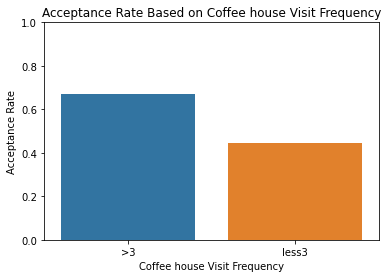

In [96]:
sns.barplot(x='coffee_visits', y='Y', data=coffee_acceptance_rate)
plt.title('Acceptance Rate Based on Coffee house Visit Frequency')
plt.xlabel('Coffee house Visit Frequency')
plt.ylabel('Acceptance Rate')
plt.ylim(0, 1)
plt.show()

Compare the acceptance rate between drivers who go to a coffee house more than once a month and are over the age of 25 to the all others. Is there a difference?

In [97]:
#create a new column coffee_visits_25 with two values, those who went to coffee house 1 or more times (>1) and those who went to the bar less than 1 times (less3)
df_cofee['coffee_visits_25'] = df_cofee['CoffeeHouse'].replace(['never', 'less1'], '<1')
df_cofee['coffee_visits_25'].replace(['1~3', 'gt8', '4~8'], '>1', inplace=True)
df_cofee.head()

<ipython-input-97-01f44f799825>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cofee['coffee_visits_25'] = df_cofee['CoffeeHouse'].replace(['never', 'less1'], '<1')
C:\Users\m_shanmugavel\Anaconda3\lib\site-packages\pandas\core\series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,coffee_visits,coffee_visits_25
23,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,...,4~8,less1,1,0,0,0,1,0,less3,<1
26,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,4~8,less1,1,0,0,0,1,0,less3,<1
27,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Male,21,Single,...,4~8,less1,1,1,0,0,1,0,less3,<1
28,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,4~8,less1,1,1,0,0,1,0,less3,<1
30,No Urgent Place,Friend(s),Sunny,80,6PM,Coffee House,2h,Male,21,Single,...,4~8,less1,1,0,0,0,1,0,less3,<1


In [98]:
#unique values in the age column
df_cofee['age'].unique()

array(['21', '46', '26', '31', '41', '50plus', '36', 'below21'],
      dtype=object)

In [99]:
#create new column with values, age >25 and < 25
df_cofee['age_25'] = df_cofee['age'].replace(['46', '26', '31', '41', '50plus', '36'], '>25')
df_cofee['age_25'].replace(['21', 'below21'], '<25', inplace=True)
df_cofee.head()

<ipython-input-99-474f7c467c3d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cofee['age_25'] = df_cofee['age'].replace(['46', '26', '31', '41', '50plus', '36'], '>25')
C:\Users\m_shanmugavel\Anaconda3\lib\site-packages\pandas\core\series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,coffee_visits,coffee_visits_25,age_25
23,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,...,less1,1,0,0,0,1,0,less3,<1,<25
26,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,less1,1,0,0,0,1,0,less3,<1,<25
27,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Male,21,Single,...,less1,1,1,0,0,1,0,less3,<1,<25
28,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,less1,1,1,0,0,1,0,less3,<1,<25
30,No Urgent Place,Friend(s),Sunny,80,6PM,Coffee House,2h,Male,21,Single,...,less1,1,0,0,0,1,0,less3,<1,<25


In [100]:
# Group by coffee house visits(less than or greater than 1 times) and age
coffee_acceptance_25 = df_cofee.groupby(['coffee_visits_25', 'age_25'])[['Y']].mean()
coffee_acceptance_rate25= coffee_acceptance_25.reset_index()


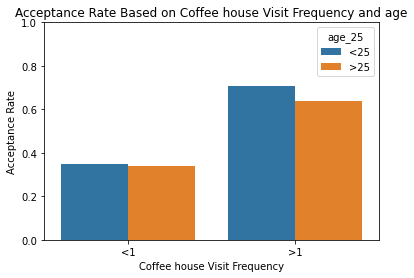

In [101]:
sns.barplot(x='coffee_visits_25', y='Y', hue="age_25", data=coffee_acceptance_rate25)
plt.title('Acceptance Rate Based on Coffee house Visit Frequency and age')
plt.xlabel('Coffee house Visit Frequency')
plt.ylabel('Acceptance Rate')
plt.ylim(0, 1)
plt.show()

#### Based on the plot above, acceptance rate is higher among drivers of age less than 25

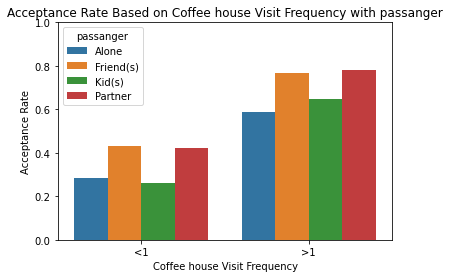

In [102]:
coffee_acceptance = df_cofee.groupby(['coffee_visits_25', 'passanger'])[['Y']].mean()
coffee_acceptance= coffee_acceptance.reset_index()
sns.barplot(x='coffee_visits_25', y='Y', hue='passanger',data=coffee_acceptance)
plt.title('Acceptance Rate Based on Coffee house Visit Frequency with passanger')
plt.xlabel('Coffee house Visit Frequency')
plt.ylabel('Acceptance Rate')
plt.ylim(0, 1)
plt.show()

In [103]:
df_cofee['temperature'].unique()

array([80, 55, 30], dtype=int64)

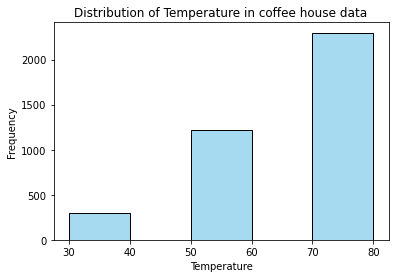

In [108]:
plt.figure(figsize=(6, 4))
sns.histplot(data=df_cofee, x='temperature', bins=5, color='skyblue', edgecolor='black')
plt.title('Distribution of Temperature in coffee house data')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

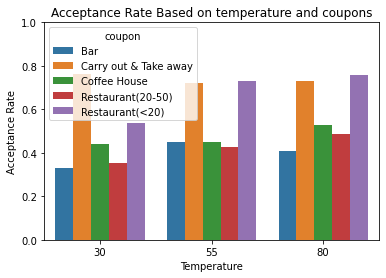

In [109]:
temp_acceptance = data.groupby(['temperature','coupon'])[['Y']].mean()
temp_acceptance= temp_acceptance.reset_index()
sns.barplot(x='temperature', y='Y', hue='coupon', data=coffee_acceptance)
plt.title('Acceptance Rate Based on temperature and coupons')
plt.xlabel('Temperature')
plt.ylabel('Acceptance Rate')
plt.ylim(0, 1)
plt.show()

#### Based on the above analysis,as expected bar coupons acceptance rate increases as temperature increases. Interestingly when the temperature is low , acceptance rate in the cheap restaurants is lower